<a href="https://colab.research.google.com/github/iamlekh/hotel_cancellation_prediction/blob/master/hotel_cancellation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
!pip install missingno

In [200]:
import pandas as pd 
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split 

In [236]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv')
df.to_csv('hotel.csv')

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

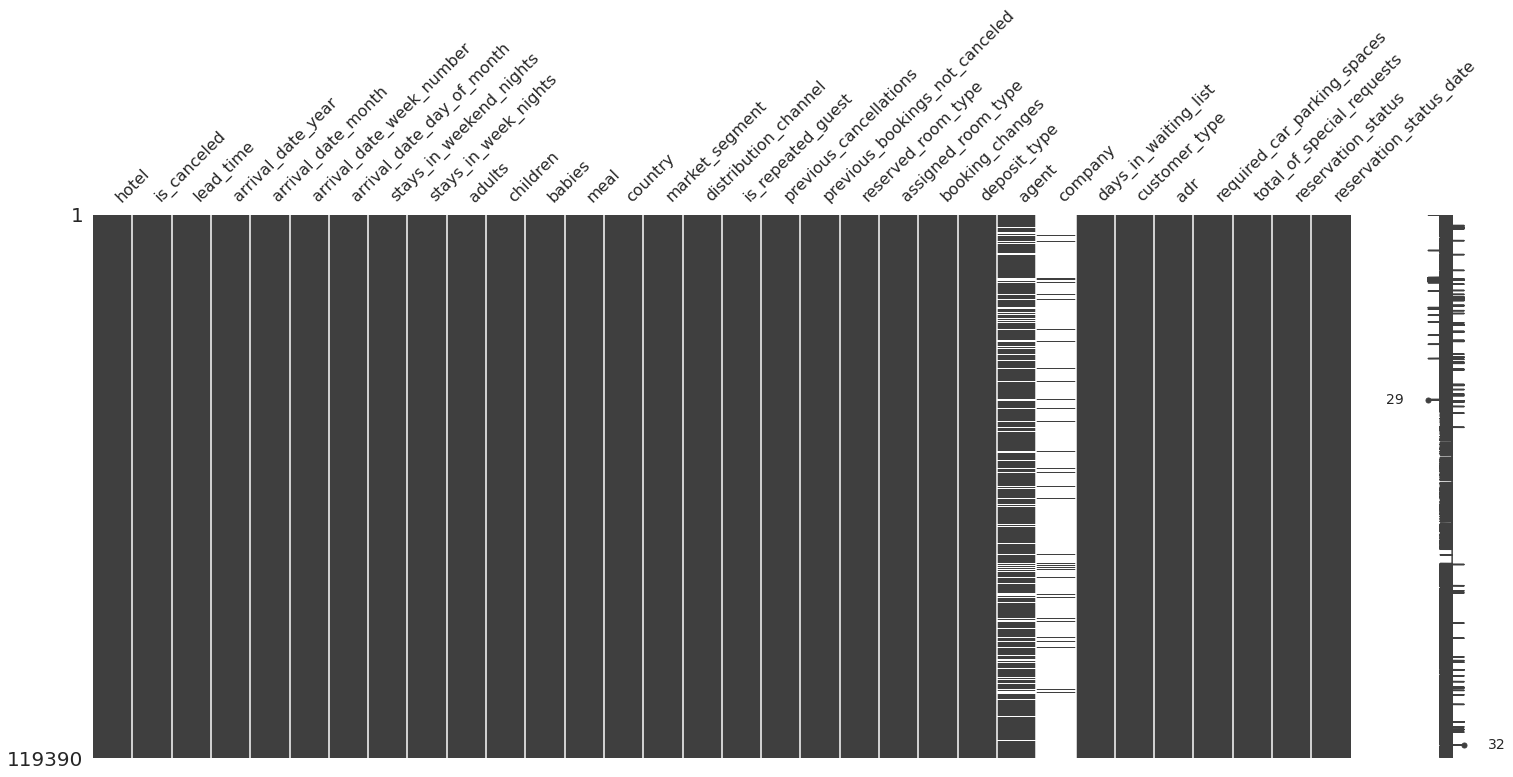

In [238]:
msno.matrix(df) 

* only company, children, agent column have missing data
* country have extra data

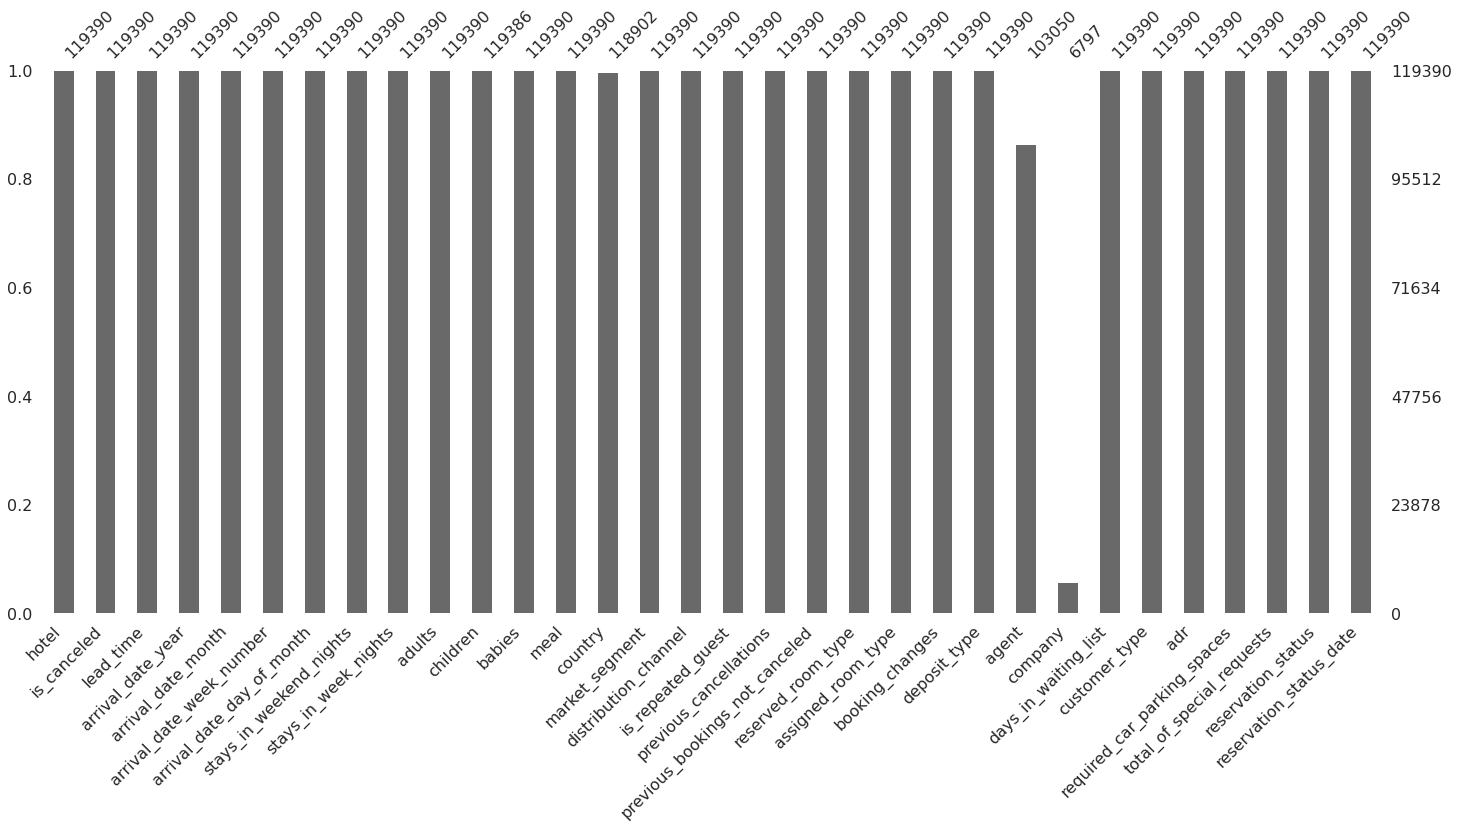

In [239]:
msno.bar(df) 

In [240]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [241]:
print("The dataset have {} rows and {} columns.".format(df.shape[0],df.shape[1]))

The dataset have 119390 rows and 32 columns.


In [242]:
#drop column
df.drop(['agent','company'],axis=1, inplace=True)
#drop row
df.dropna(axis=0,how='any', inplace = True)

In [243]:
print("after cleaning the null value we have {} rows and {} columns.".format(df.shape[0],df.shape[1]))

after cleaning the null value we have 118898 rows and 30 columns.


Features that were removed:

1. hotel=This feature tended to bring the accuracy of the model down, in testing, so it was removed from the modeling data.
2. arrival_date_year=This feature does not logically make sense, as the goal is to predict future bookings cancelation status.
3. arrival_date_week_number=This feature does not logically make sense, as it too specific about the booking timeframe,there could have been local events that could have effected the bookings, or other outside factors.
this feature also tended to bring the accuracy down in testing.
4. arrival_date_day_of_month=For the same reasons above, this is too specific, yet also too broad of a feature revolved around dates.
5. reservation_status=This feature is a direct representation of whether a booking is canceled or retained, it was removed.
6. reservation_status_date=This will have no correlation to future bookings.

In [244]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,118898,118898.000000,118898.000000,118898.000000,118898,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898,118898,118898,118898,118898.000000,118898.000000,118898.000000,118898,118898,118898.000000,118898,118898.000000,118898,118898.000000,118898.000000,118898.000000,118898,118898
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,7,5,NaN,NaN,NaN,10,12,NaN,3,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79302,NaN,NaN,NaN,13852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91863,48586,56402,97730,NaN,NaN,NaN,85601,73863,NaN,104163,NaN,89174,NaN,NaN,NaN,74745,1461
mean,NaN,0.371352,104.311435,2016.157656,NaN,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,NaN,NaN,NaN,NaN,0.032011,0.087142,0.131634,NaN,NaN,0.221181,NaN,2.330754,NaN,102.003243,0.061885,0.571683,NaN,NaN
std,NaN,0.483168,106.903309,0.707459,NaN,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,NaN,NaN,NaN,NaN,0.176029,0.845869,1.484672,NaN,NaN,0.652785,NaN,17.630452,NaN,50.485862,0.244172,0.792678,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,70.000000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,95.000000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,161.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


* 'hotel' - can be remove --done
* 'is_canceled'- mean is 0.371352 we have to sample it (upsample/downsample) 
* 'lead_time' - min=0 max=737 mean=104 50% of the cust booked room b

* 'stays_in_weekend_nights',
* 'stays_in_week_nights'
* 'adults'- most of the
* 'children', 
'babies',
* 'meal'- have to look
* 'booking_changes'- may be some outliers
* 'days_in_waiting_list'- may be some outliers
* 'adr'- outliers --done
      

In [245]:
df.drop(['hotel','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','reservation_status_date','reservation_status'],axis=1, inplace=True)

In [246]:
d1 = {1 :'yes', 0: 'no'}
dftemp = df.replace({"is_canceled": d1})
#            di = {1: "A", 2: "B"}
# df.replace({"col1": di}
#            di = {1: "A", 2: "B"}
# df.replace({"col1": di}
#            di = {1: "A", 2: "B"}
# df.replace({"col1": di}
#            di = {1: "A", 2: "B"}
# df.replace({"col1": di}
#            di = {1: "A", 2: "B"}
# df.replace({"col1": di}
#            di = {1: "A", 2: "B"}
# df.replace({"col1": di}
#            di = {1: "A", 2: "B"}
# df.replace({"col1": di}
#            di = {1: "A", 2: "B"}
# df.replace({"col1": di}

In [247]:
dftemp.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,no,342,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0
1,no,737,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0
2,no,7,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0
3,no,13,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0
4,no,14,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1


In [248]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [214]:
df.shape

(86038, 23)

In [215]:
print('# of cancel cases {} & # of not cancel cases {}'.format(df['is_canceled'][df['is_canceled']== 1].count(),df['is_canceled'][df['is_canceled']== 0].count()))

# of cancel cases 23666 & # of not cancel cases 62372


In [216]:
print('% of cancel cases {}% & % of not cancel cases {}%'.format(round((df['is_canceled'][df['is_canceled']== 1].count()/df.shape[0])*100,2),round((df['is_canceled'][df['is_canceled']== 0].count()/df.shape[0])*100,2)))

% of cancel cases 27.51% & % of not cancel cases 72.49%


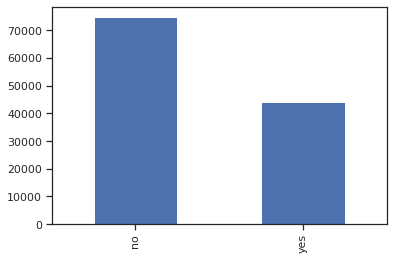

In [217]:
dftemp['is_canceled'].value_counts().plot(kind='bar')

Our data is not properly sampled

In [218]:
#graphs

In [219]:
columns = ['is_canceled',  'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests']

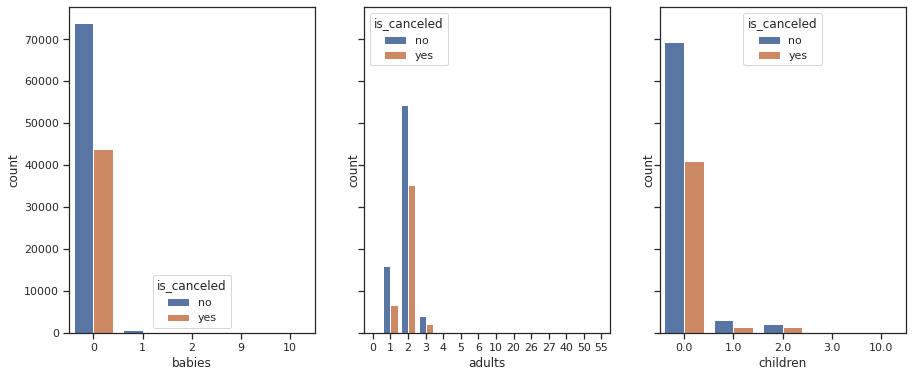

In [220]:
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(15,6),sharey=True)
sns.countplot(dftemp["babies"],hue=dftemp["is_canceled"], ax=ax1)
sns.countplot(dftemp["adults"], hue=dftemp["is_canceled"],ax=ax2)
sns.countplot(dftemp["children"], hue=dftemp["is_canceled"],ax=ax3)

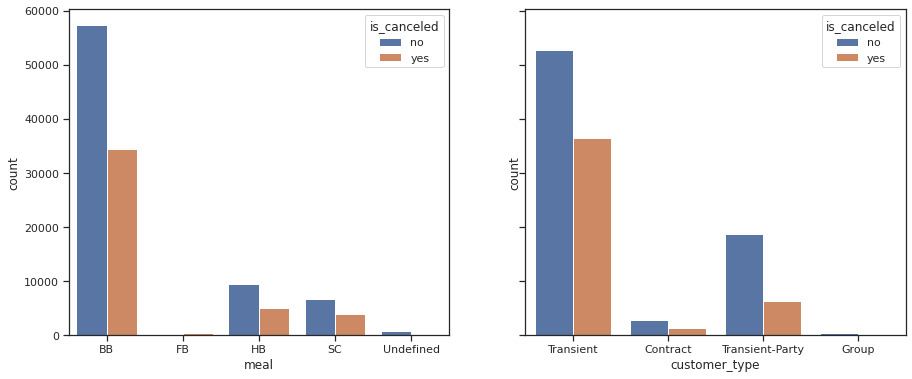

In [221]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6),sharey=True)
sns.countplot("meal",hue="is_canceled",data = dftemp, ax=ax1) 
sns.countplot("customer_type", hue="is_canceled",data = dftemp,ax=ax2)


*   Meal types FB have high proportion of cancallation
*   undefine mealetype are not canceled
*   Ratio of cancallation of groups are less


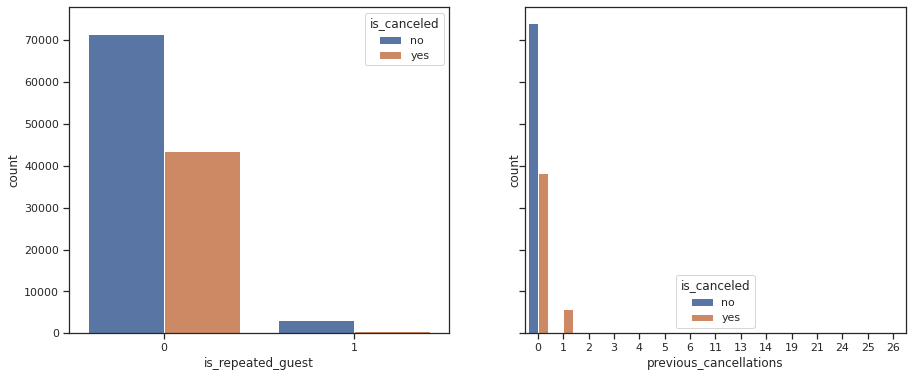

In [222]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6),sharey=True)
sns.countplot("is_repeated_guest",hue="is_canceled",data = dftemp, ax=ax1) 
sns.countplot("previous_cancellations", hue="is_canceled",data = dftemp,ax=ax2)


[None, None, None, None, None, None]

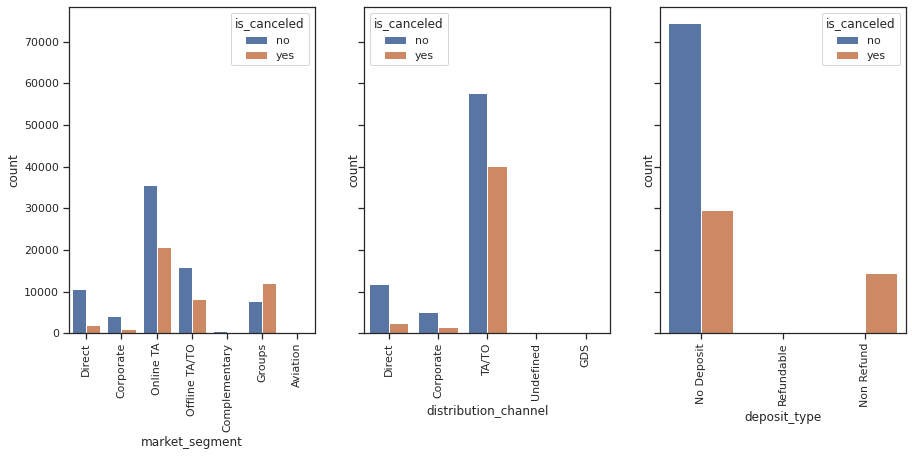

In [223]:
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(15,6),sharey=True)
sns.countplot(x = dftemp["market_segment"],hue=dftemp["is_canceled"], ax=ax1)
sns.countplot(x =dftemp["distribution_channel"], hue=dftemp["is_canceled"],ax=ax2)
sns.countplot(x =dftemp["deposit_type"], hue=dftemp["is_canceled"],ax=ax3)
plt.setp(ax1.get_xticklabels(), rotation=90)
plt.setp(ax2.get_xticklabels(), rotation=90)
plt.setp(ax3.get_xticklabels(), rotation=90)

*  marketing for groups are canceled more.
* TA/TO channel booking are usually cancelled.
*  


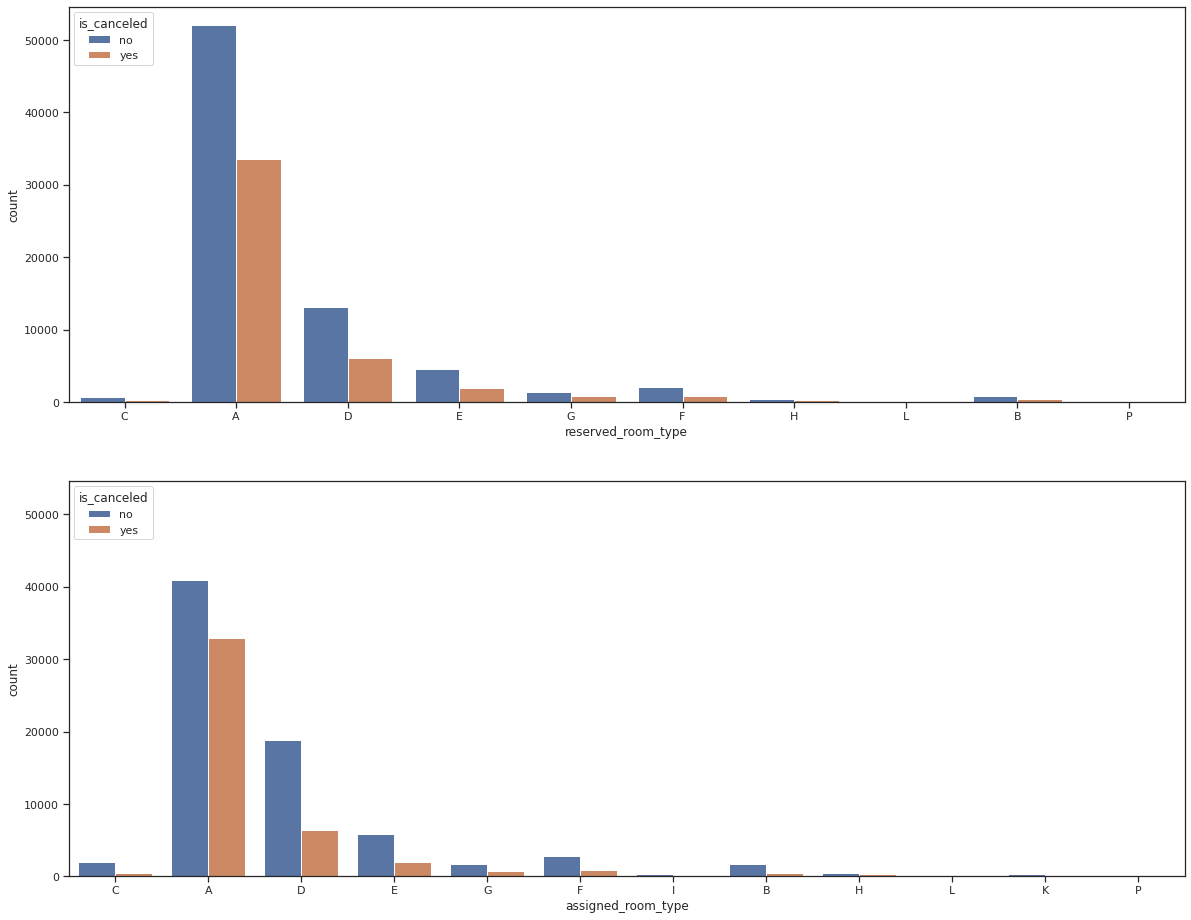

In [224]:



fig, (ax1, ax2) = plt.subplots(ncols=1,nrows=2, figsize=(20,16),sharey=True)
sns.countplot("reserved_room_type",hue="is_canceled",data = dftemp, ax=ax1) 
sns.countplot("assigned_room_type", hue="is_canceled",data = dftemp,ax=ax2)


In [225]:

df['required_car_parking_spaces'].value_counts()

0    78849
1     7156
2       28
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

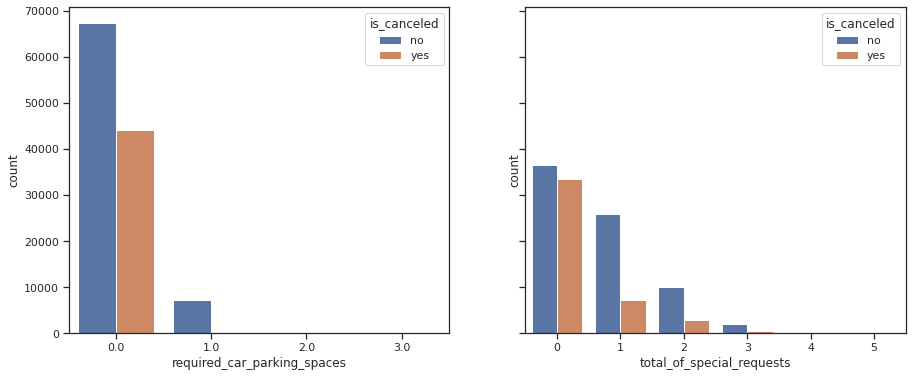

In [226]:
dftemp["required_car_parking_spaces"] = dftemp['required_car_parking_spaces'][dftemp['required_car_parking_spaces'] < 8 ]
dftemp["required_car_parking_spaces"] = dftemp['required_car_parking_spaces'][dftemp['required_car_parking_spaces'] < 8 ]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6),sharey=True)
sns.countplot("required_car_parking_spaces",hue="is_canceled",data = dftemp, ax=ax1) 
sns.countplot("total_of_special_requests", hue="is_canceled",data = dftemp,ax=ax2)




*   people with 1 car parking request don't cancel booking
*   people having special request tends to retain request

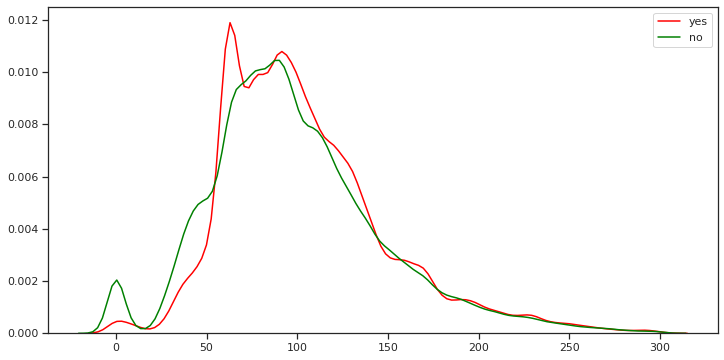

In [227]:
dftemp["adr"] = dftemp['adr'][dftemp['adr'] <= 300 ]
df["adr"] = df['adr'][df['adr'] <= 300 ]

fig, (ax1) = plt.subplots(ncols=1,nrows=1, figsize=(12,6),sharey=True)
sns.kdeplot(dftemp["adr"][dftemp['is_canceled'] == 'yes' ],color = 'red',label = 'yes', ax=ax1) 
sns.kdeplot(dftemp["adr"][dftemp['is_canceled'] == 'no' ],color = 'green' ,label = 'no',ax=ax1) 

After removing the outliers
ADR is almost same

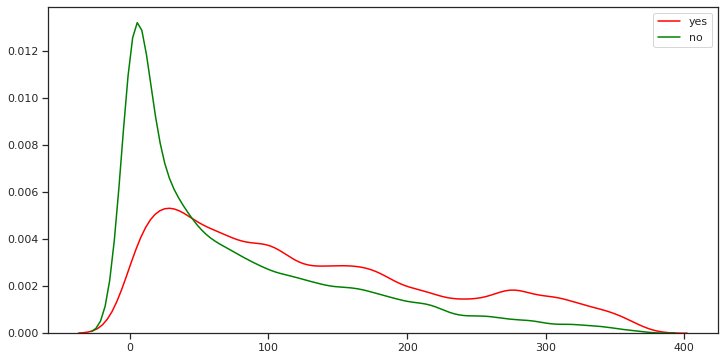

In [228]:
dftemp["lead_time"] = dftemp['lead_time'][dftemp['lead_time'] <= 365 ]
df["lead_time"] = df['lead_time'][df['lead_time'] <= 365 ]

fig, (ax1) = plt.subplots(ncols=1,nrows=1, figsize=(12,6),sharey=True)
sns.kdeplot(dftemp["lead_time"][dftemp['is_canceled'] == 'yes' ],color = 'red',label = 'yes', ax=ax1) 
sns.kdeplot(dftemp["lead_time"][dftemp['is_canceled'] == 'no' ],color = 'green' ,label = 'no',ax=ax1) 



*   People having more leading time don't retain booking



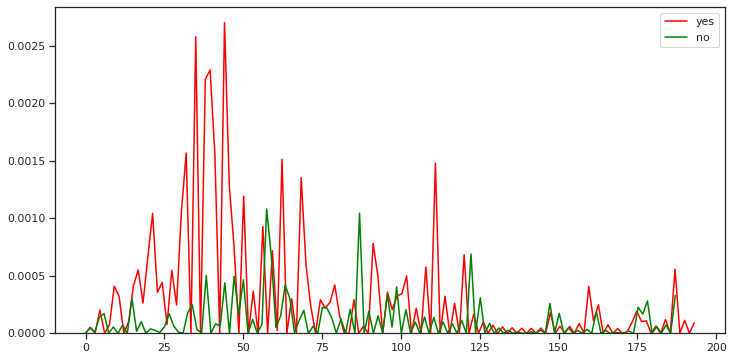

In [229]:
dftemp["days_in_waiting_list"] = dftemp['days_in_waiting_list'][dftemp['days_in_waiting_list'] <= 200 ]
df["days_in_waiting_list"] = df['days_in_waiting_list'][df['days_in_waiting_list'] <= 200 ]

fig, (ax1) = plt.subplots(ncols=1,nrows=1, figsize=(12,6),sharey=True)
sns.kdeplot(dftemp["days_in_waiting_list"][dftemp['is_canceled'] == 'yes' ],color = 'red',label = 'yes', ax=ax1) 
sns.kdeplot(dftemp["days_in_waiting_list"][dftemp['is_canceled'] == 'no' ],color = 'green' ,label = 'no',ax=ax1) 

*   Waiting list people usually cancel the booking

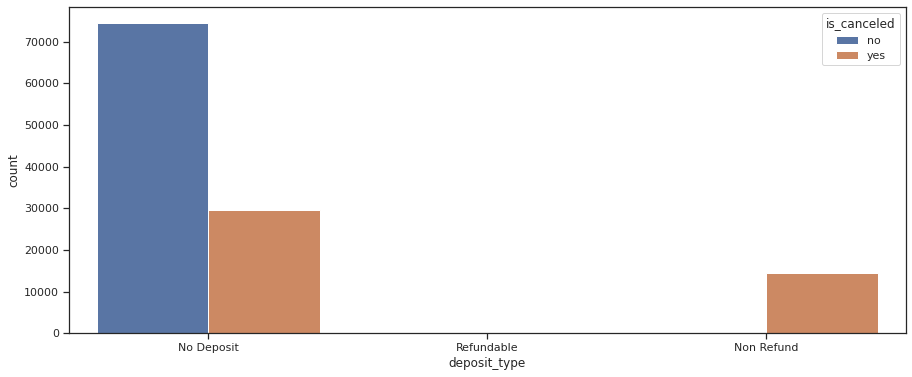

In [230]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(15,6),sharey=True)
sns.countplot("deposit_type",hue="is_canceled",data = dftemp, ax=ax1) 

In [234]:
dfm.drop(dfm.columns,axis = 1,inplace=True)

AttributeError: ignored

In [281]:
#modeling
dfm = df.copy()
dfm.dropna(axis=0,how='any', inplace = True)
dfm.reset_index(inplace = True)

column=["meal",'market_segment','reserved_room_type','assigned_room_type','booking_changes','deposit_type','customer_type']
dfm = pd.get_dummies(dfm,columns=column )
dfm.drop(dfm[['distribution_channel','country', 'index']],axis = 1, inplace = True)	
print(dfm.shape)
dfm.head()

(86038, 76)


,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,booking_changes_0,booking_changes_1,booking_changes_2,booking_changes_3,booking_changes_4,booking_changes_5,booking_changes_6,booking_changes_7,booking_changes_8,booking_changes_9,booking_changes_10,booking_changes_11,booking_changes_12,booking_changes_13,booking_changes_14,booking_changes_15,booking_changes_16,booking_changes_17,booking_changes_18,booking_changes_20,booking_changes_21,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,0,0,2,0.0,0,0,0,0,0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,737,0,0,2,0.0,0,0,0,0,0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,7,0,1,1,0.0,0,0,0,0,0,75.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,13,0,1,1,0.0,0,0,0,0,0,75.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,14,0,2,2,0.0,0,0,0,0,0,98.0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [286]:
x = dfm.drop(dfm[['is_canceled']],axis = 1)	
y = df['is_canceled']

In [ ]:
#base model 

#model feature
n_estimators=100
max_depth=None
min_samples_leaf=30 
random_state=None
verbose=0
warm_start=False
class_weight=None

 #split

In [287]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.70) 


In [283]:

# importing random forest classifier from assemble module 
from sklearn.ensemble import RandomForestClassifier 
import pandas as pd 

In [288]:
# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100) 

# Training the model on the training dataset 
# fit function is used to train the model using the training sets as parameters 
clf.fit(X_train, y_train) 

# performing predictions on the test dataset 
y_pred = clf.predict(X_test) 

# metrics are used to find accuracy or error 
from sklearn import metrics 
print() 

# using metrics module for accuracy calculation 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)) 



ACCURACY OF THE MODEL:  0.7942451060155744


In [ ]:
# predicting which type of flower it is. 
clf.predict([[3, 3, 2, 2]]) 


In [ ]:
lb_results 
